In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('kidney_disease.csv')

In [3]:
data.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
data.rename(columns={'bp': 'blood_pressure', 'sg': 'specific gravity','al':'albumin','su':'sugar','rbc':'red blood cells','pc':'pus cell','pcc':'pus cell clumps','ba':'bacteria','bgr':'blood glucose random','bu':'blood urea','sc':'serum creatinine','sod':'sodium','pot':'potassium','hemo':'hemoglobin','pcv':'packed cell volume','wc':'white blood cell count','rc':'red blood cell count','htn':'hypertension','dm':'diabetes mellitus','cad':'coronary artery disease','appet':'appetite','pe':'pedal edema','ane':'anemia','classification':'class'},inplace=True)

In [5]:
data.head()

,id,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [6]:
data.shape

(400, 26)

In [7]:
data.describe()

,id,age,blood_pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       400 non-null    int64  
 1   age                      391 non-null    float64
 2   blood_pressure           388 non-null    float64
 3   specific gravity         353 non-null    float64
 4   albumin                  354 non-null    float64
 5   sugar                    351 non-null    float64
 6   red blood cells          248 non-null    object 
 7   pus cell                 335 non-null    object 
 8   pus cell clumps          396 non-null    object 
 9   bacteria                 396 non-null    object 
 10  blood glucose random     356 non-null    float64
 11  blood urea               381 non-null    float64
 12  serum creatinine         383 non-null    float64
 13  sodium                   313 non-null    float64
 14  potassium                3

In [9]:
data.isnull().sum()

id                           0
age                          9
blood_pressure              12
specific gravity            47
albumin                     46
sugar                       49
red blood cells            152
pus cell                    65
pus cell clumps              4
bacteria                     4
blood glucose random        44
blood urea                  19
serum creatinine            17
sodium                      87
potassium                   88
hemoglobin                  52
packed cell volume          70
white blood cell count     105
red blood cell count       130
hypertension                 2
diabetes mellitus            2
coronary artery disease      2
appetite                     1
pedal edema                  1
anemia                       1
class                        0
dtype: int64

In [10]:
#Filling null values  with the mean  for the numerical column
data = data.fillna(data.mean())


In [11]:
#Filling the categorical column with the most frequent class
data = data.apply(lambda x: x.fillna(x.value_counts().index[0]))

In [12]:
data.isnull().sum()

id                         0
age                        0
blood_pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         0
white blood cell count     0
red blood cell count       0
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [13]:
#droping column id
data.drop('id', axis=1, inplace = True)


In [14]:
data.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.000000,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,148.036517,...,38,6000,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.000000,...,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.000000,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.000000,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [15]:
from sklearn.preprocessing import LabelEncoder as Lb
encoder = Lb()

In [16]:
data['red blood cells'] = encoder.fit_transform(data['red blood cells'])
data['pus cell'] = encoder.fit_transform(data['pus cell'])
data['pus cell clumps'] = encoder.fit_transform(data['pus cell clumps'])
data['bacteria'] = encoder.fit_transform(data['bacteria'])
data['hypertension'] = encoder.fit_transform(data['hypertension'])
data['diabetes mellitus'] = encoder.fit_transform(data['diabetes mellitus'])
data['coronary artery disease'] = encoder.fit_transform(data['coronary artery disease'])
data['appetite'] = encoder.fit_transform(data['appetite'])
data['pedal edema'] = encoder.fit_transform(data['pedal edema'])
data['anemia'] = encoder.fit_transform(data['anemia'])
data['class'] = encoder.fit_transform(data['class'])


In [17]:
data.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,44,7800,5.2,1,4,1,0,0,0,0
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,38,6000,5.2,0,3,1,0,0,0,0
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,31,7500,5.2,0,4,1,1,0,1,0
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,32,6700,3.9,1,3,1,1,1,1,0
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,35,7300,4.6,0,3,1,0,0,0,0


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      400 non-null    float64
 1   blood_pressure           400 non-null    float64
 2   specific gravity         400 non-null    float64
 3   albumin                  400 non-null    float64
 4   sugar                    400 non-null    float64
 5   red blood cells          400 non-null    int32  
 6   pus cell                 400 non-null    int32  
 7   pus cell clumps          400 non-null    int32  
 8   bacteria                 400 non-null    int32  
 9   blood glucose random     400 non-null    float64
 10  blood urea               400 non-null    float64
 11  serum creatinine         400 non-null    float64
 12  sodium                   400 non-null    float64
 13  potassium                400 non-null    float64
 14  hemoglobin               4

In [19]:
# converting  packed cell volume, white blood cell count, red blood cell count and age columns to their appropriate data.

data['packed cell volume'] = pd.to_numeric(data['packed cell volume'], errors='coerce')
data['white blood cell count'] = pd.to_numeric(data['white blood cell count'], errors='coerce')
data['red blood cell count'] = pd.to_numeric(data['red blood cell count'], errors='coerce')

data['age'] = data['age'].astype('int')

In [20]:
data.isnull().sum()

age                        0
blood_pressure             0
specific gravity           0
albumin                    0
sugar                      0
red blood cells            0
pus cell                   0
pus cell clumps            0
bacteria                   0
blood glucose random       0
blood urea                 0
serum creatinine           0
sodium                     0
potassium                  0
hemoglobin                 0
packed cell volume         1
white blood cell count     1
red blood cell count       1
hypertension               0
diabetes mellitus          0
coronary artery disease    0
appetite                   0
pedal edema                0
anemia                     0
class                      0
dtype: int64

In [21]:
data  = data.dropna()

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      397 non-null    int32  
 1   blood_pressure           397 non-null    float64
 2   specific gravity         397 non-null    float64
 3   albumin                  397 non-null    float64
 4   sugar                    397 non-null    float64
 5   red blood cells          397 non-null    int32  
 6   pus cell                 397 non-null    int32  
 7   pus cell clumps          397 non-null    int32  
 8   bacteria                 397 non-null    int32  
 9   blood glucose random     397 non-null    float64
 10  blood urea               397 non-null    float64
 11  serum creatinine         397 non-null    float64
 12  sodium                   397 non-null    float64
 13  potassium                397 non-null    float64
 14  hemoglobin               3

In [23]:
#Seperating the numerical variable and categerical variable to properly explore the distribution of the variables

numerical_features = data.select_dtypes(exclude='object')
categorical_features = data.select_dtypes(include='object')

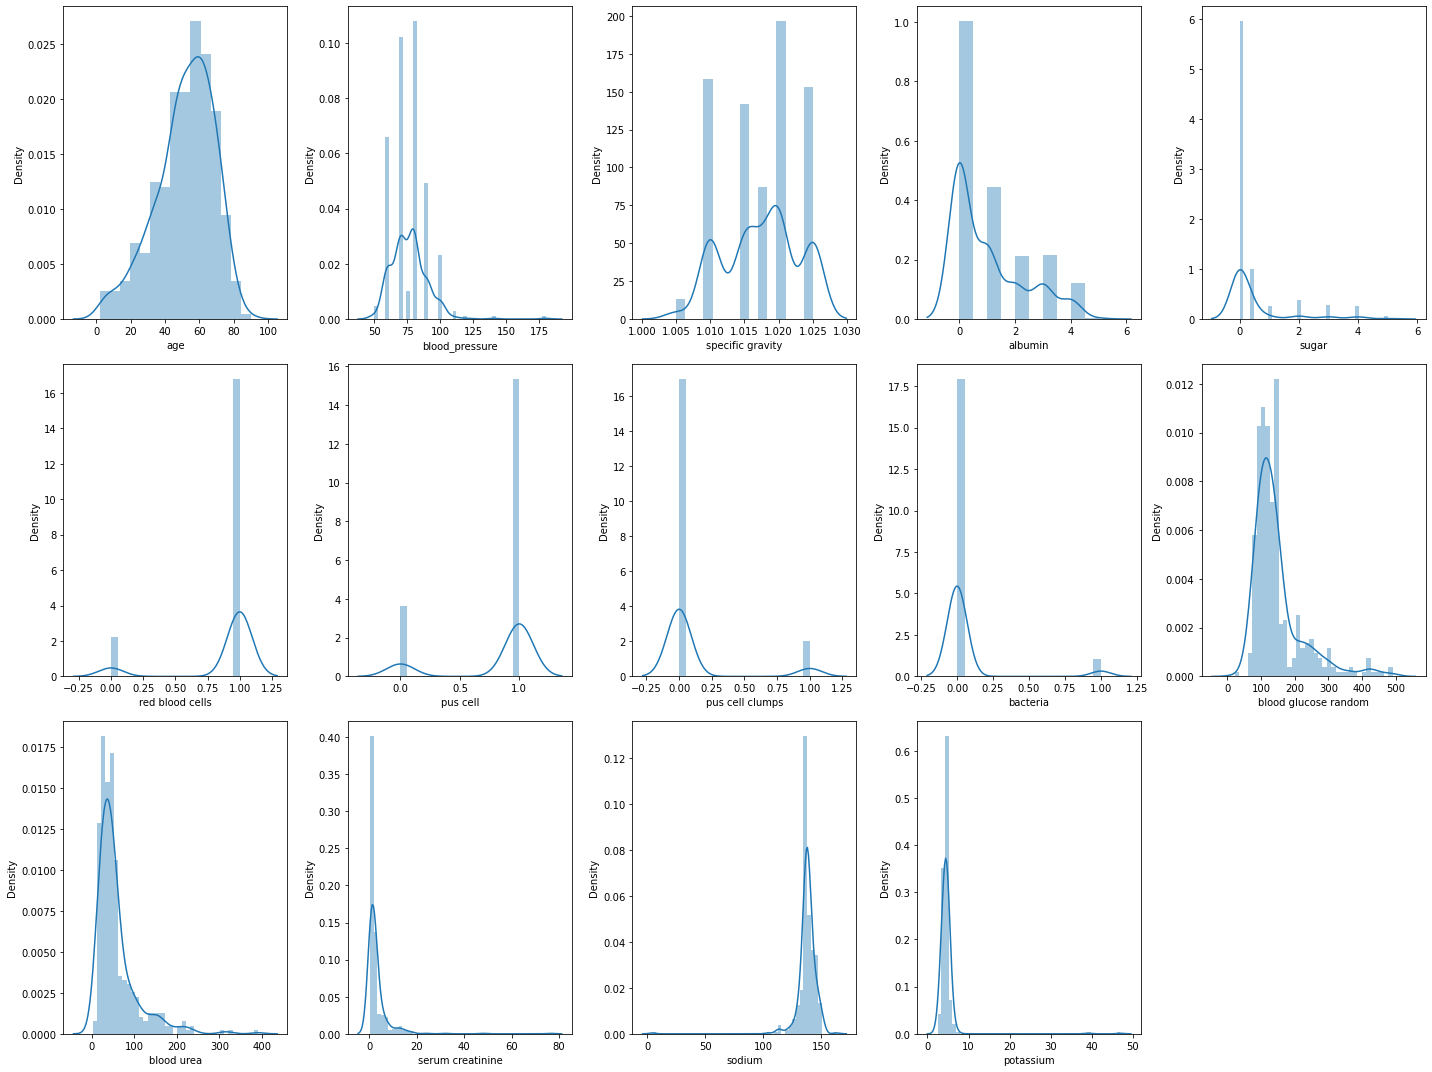

In [24]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in numerical_features:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

In [25]:
plt.figure(figsize = (20, 15))
plotnumber = 1

for column in categorical_features:
    if plotnumber <= 11:
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(data[column], palette = 'hls')
        plt.xlabel(column)
        
    plotnumber += 1

plt.tight_layout()
plt.show()

<Figure size 1440x1080 with 0 Axes>

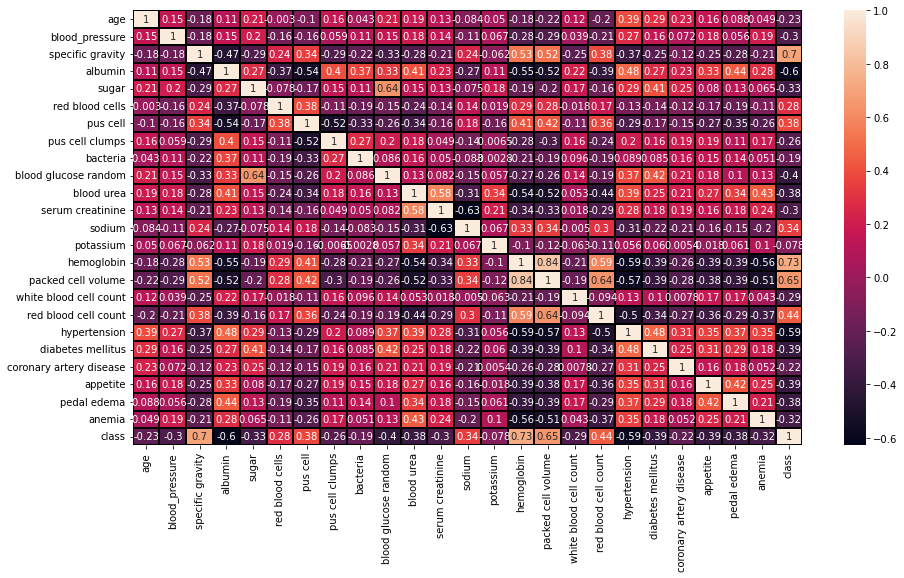

In [26]:
#Checking for correlation between the features and label

plt.figure(figsize = (15, 8))

sns.heatmap(data.corr(), annot = True, linewidths = 2, linecolor = 'black')
plt.show()

In [27]:
#Feature and label Extraction

x = data[['specific gravity', 'albumin', 'hemoglobin', 'packed cell volume','red blood cell count', 'hypertension']]

y = data['class'].values

Logistic Regression

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

#Data Spliting 
X_train, X_test, y_train, y_test = train_test_split(x,y , test_size=0.3, random_state=30)


model = LogisticRegression()


model.fit(X_train, y_train)

LogisticRegression()

In [29]:
X_test

,specific gravity,albumin,hemoglobin,packed cell volume,red blood cell count,hypertension
35,1.020,2.0,12.000000,36.0,4.9,1
342,1.020,0.0,15.000000,50.0,6.3,0
284,1.025,0.0,16.900000,52.0,6.0,0
75,1.015,1.0,8.100000,41.0,5.2,0
360,1.025,0.0,14.700000,43.0,6.2,0
...,...,...,...,...,...,...
61,1.010,1.0,12.526437,41.0,5.2,0
365,1.020,0.0,12.526437,41.0,6.3,0
129,1.025,1.0,11.100000,41.0,5.2,1
94,1.010,0.0,11.600000,36.0,3.9,0


In [30]:
model.predict(X_test)

array([0, 2, 2, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0,
       0, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2,
       0, 0, 0, 2, 2, 0, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0,
       2, 2, 0, 2, 2, 0, 2, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 0, 2, 0, 0, 2, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0])

In [31]:
model.score(X_train, y_train)

0.9566787003610109

In [32]:
model.score(X_test, y_test)

0.975

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

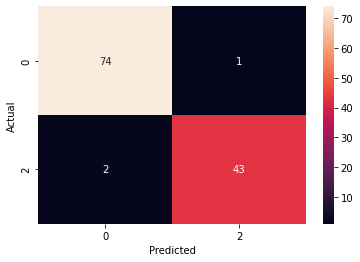

In [33]:
#confusion matrix
y_pred = model.predict(X_test)

confusion_matrix = pd.crosstab(y_test,y_pred,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(confusion_matrix,annot = True)

In [34]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           2       0.98      0.96      0.97        45

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



KNN

In [35]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(5)

X_train, X_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=20)

In [36]:
model.fit(X_train,y_train)

KNeighborsClassifier()

In [37]:
print(f'The accuracy of the model is {accuracy_score(y_pred, y_test)}')

The accuracy of the model is 0.55


In [38]:
print(f'The accuracy of the model is {accuracy_score(model.predict(X_train), y_train)}')

The accuracy of the model is 0.9638989169675091


In [39]:
scores = []
for k in range(1,20):
  model = KNeighborsClassifier(k)
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  print(f'{k}:{accuracy_score(y_pred,y_test)}')
  scores.append(accuracy_score(y_pred,y_test))

1:0.9333333333333333
2:0.9333333333333333
3:0.9416666666666667
4:0.95
5:0.925
6:0.9333333333333333
7:0.9333333333333333
8:0.9333333333333333
9:0.925
10:0.925
11:0.925
12:0.925
13:0.925
14:0.9333333333333333
15:0.9333333333333333
16:0.9333333333333333
17:0.9333333333333333
18:0.9333333333333333
19:0.9333333333333333


Text(0.5, 1.0, 'Testing Accuracy for different values of K')

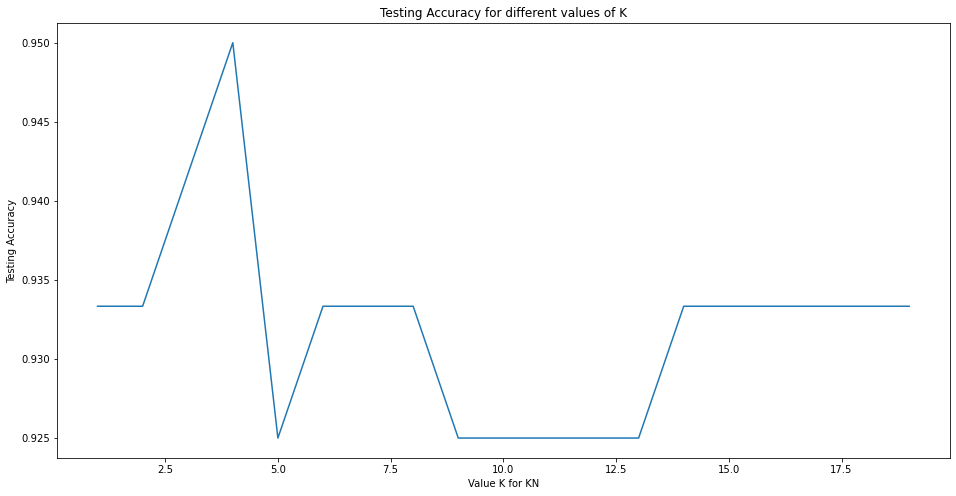

In [40]:
import matplotlib.pyplot as plt
plt.figure(figsize = (16,8))
plt.plot(range(1,20), scores)
plt.xlabel('Value K for KN')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy for different values of K')

The optimal number of neighbor is 1 because it gives the most appropriate accuracy 0.93 for the KNN model

Decision Tree

In [41]:
from sklearn.model_selection import train_test_split
from sklearn import tree   
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [42]:
X_train , X_test,  y_train,  y_test = train_test_split(x, y, test_size=0.3, random_state=20)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_pred, y_test)

0.9833333333333333

In [43]:
accuracy_score(model.predict(X_train), y_train)

0.9927797833935018

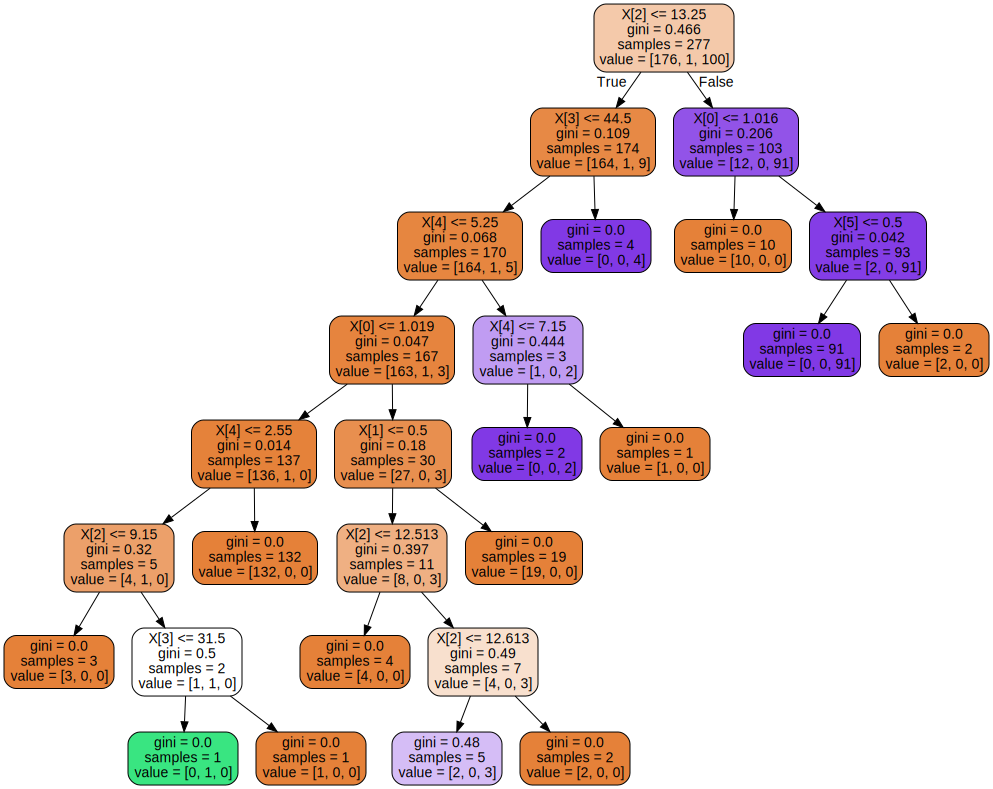

In [44]:
#Decision Tree Visualization using Graphviz

import graphviz
graph_ = tree.export_graphviz(model,label='all',rounded=True,filled=True)
graph = graphviz.Source(graph_)

import os
os.environ["PATH"] += os.pathsep + 'C:/Program Files (x86)/Graphviz/bin/'

graph.render("data")
graph

Random Forest

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=0)

model = RandomForestClassifier(n_estimators=5)
model.fit(X_train,y_train)

RandomForestClassifier(n_estimators=5)

In [46]:
y_pred = model.predict(X_test)
print(f'The accuracy for the test data :{metrics.accuracy_score(y_pred,y_test)}')

The accuracy for the test data :0.975


In [47]:
y_pred_train = model.predict(X_train)
print(f'The accuracy for the train data :{metrics.accuracy_score(y_pred_train,y_train)}')

The accuracy for the train data :0.9842271293375394


In [48]:
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier(n_estimators=5)
scores = cross_val_score(model,x,y, cv=5)

print(f'Accuracy on each fold: {scores}')
print(f'Accuracy on each accuracy: {sum(scores)/5}')


Accuracy on each fold: [0.9875     0.9625     0.96202532 0.97468354 0.98734177]
Accuracy on each accuracy: 0.9748101265822784


The graph below summariers the accuracys for all the models

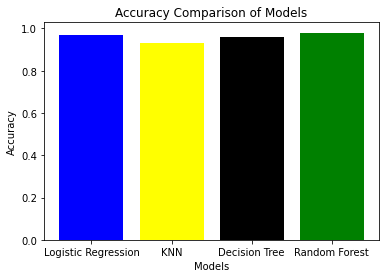

In [49]:
# Define the models and their accuracy scores
models = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest']
accuracy_scores = [0.97, 0.93, 0.96, 0.98]

# Specify the colors for each bar
colors = ['blue', 'yellow', 'black', 'green']


# Plot the bar graph
x_pos = np.arange(len(models))
plt.bar(x_pos, accuracy_scores, align='center' , color=colors)
plt.xticks(x_pos, models)
plt.ylabel('Accuracy')
plt.xlabel('Models')
plt.title('Accuracy Comparison of Models')
plt.show()

The models used are accurately predicting if a patient has chronic kidney disease or not. But the most suitable is the Random Forest classifier, which has the highest accuracy of 0.98 

Part 2 using Unsupervised Learning

In [50]:
data.drop('class', axis=1, inplace = True)

In [51]:
data.head()

,age,blood_pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,hemoglobin,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia
0,48,80.0,1.020,1.0,0.0,1,1,0,0,121.000000,...,15.4,44.0,7800.0,5.2,1,4,1,0,0,0
1,7,50.0,1.020,4.0,0.0,1,1,0,0,148.036517,...,11.3,38.0,6000.0,5.2,0,3,1,0,0,0
2,62,80.0,1.010,2.0,3.0,1,1,0,0,423.000000,...,9.6,31.0,7500.0,5.2,0,4,1,1,0,1
3,48,70.0,1.005,4.0,0.0,1,0,1,0,117.000000,...,11.2,32.0,6700.0,3.9,1,3,1,1,1,1
4,51,80.0,1.010,2.0,0.0,1,1,0,0,106.000000,...,11.6,35.0,7300.0,4.6,0,3,1,0,0,0


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397 entries, 0 to 399
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      397 non-null    int32  
 1   blood_pressure           397 non-null    float64
 2   specific gravity         397 non-null    float64
 3   albumin                  397 non-null    float64
 4   sugar                    397 non-null    float64
 5   red blood cells          397 non-null    int32  
 6   pus cell                 397 non-null    int32  
 7   pus cell clumps          397 non-null    int32  
 8   bacteria                 397 non-null    int32  
 9   blood glucose random     397 non-null    float64
 10  blood urea               397 non-null    float64
 11  serum creatinine         397 non-null    float64
 12  sodium                   397 non-null    float64
 13  potassium                397 non-null    float64
 14  hemoglobin               3

In [53]:
#Extracting features for clustering 
X = data[['blood_pressure','diabetes mellitus']]

hierarchical Clustering using Agglomerative

In [60]:
from sklearn.cluster import AgglomerativeClustering 

model = AgglomerativeClustering(n_clusters=5, affinity='euclidean',linkage='complete')

In [61]:
clust_labels = model.fit_predict(X)

clust_df = pd.DataFrame(clust_labels)

clust_df.value_counts()

0    313
1     78
3      4
2      1
4      1
dtype: int64

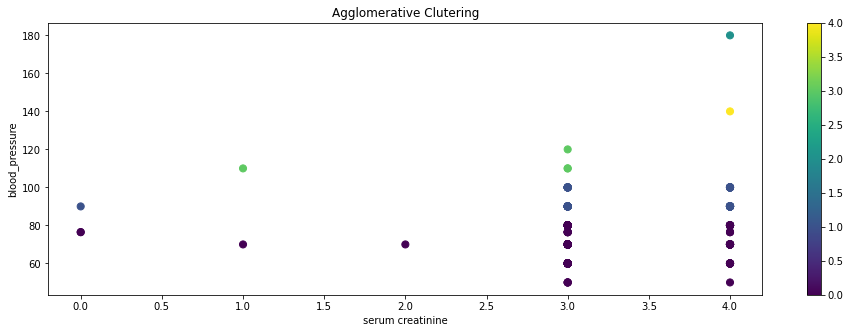

In [62]:
import matplotlib.pyplot as plt
fig =plt.figure(figsize=(16,5))
ax = fig.add_subplot(1,1,1)
scatter = ax.scatter(data['diabetes mellitus'] , data['blood_pressure'], s=50, c=clust_df[0])


ax.set_title("Agglomerative Clutering")
ax.set_xlabel("serum creatinine")
ax.set_ylabel("blood_pressure")
plt.colorbar(scatter)

Plotting the Dendogram

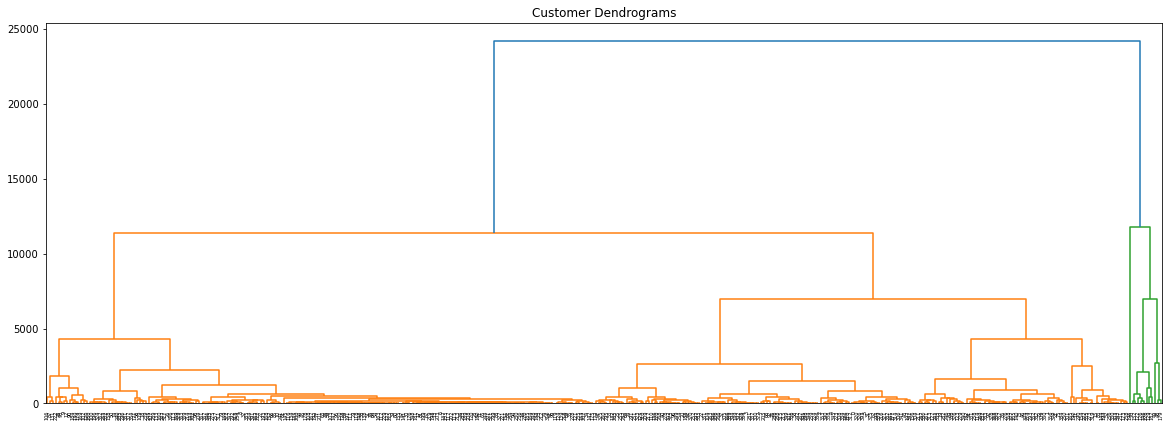

In [63]:
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(20,7))
plt.title("Customer Dendrograms")

dend=shc.dendrogram(shc.linkage(data, method="complete"))

K means Clustering

In [64]:
from pandas.core.common import random_state
from sklearn.cluster import KMeans

model2 = KMeans(n_clusters=5,random_state=0)

X_train = X.loc[:180]
X_test = X.loc[180:]


model2.fit(X_train)

KMeans(n_clusters=5, random_state=0)

In [65]:
# Best K value 

sum_of_squared_dist = []

for i in range(1,10):
  model = KMeans(n_clusters=i)
  model.fit(X_train)
  sum_of_squared_dist.append(model.inertia_)

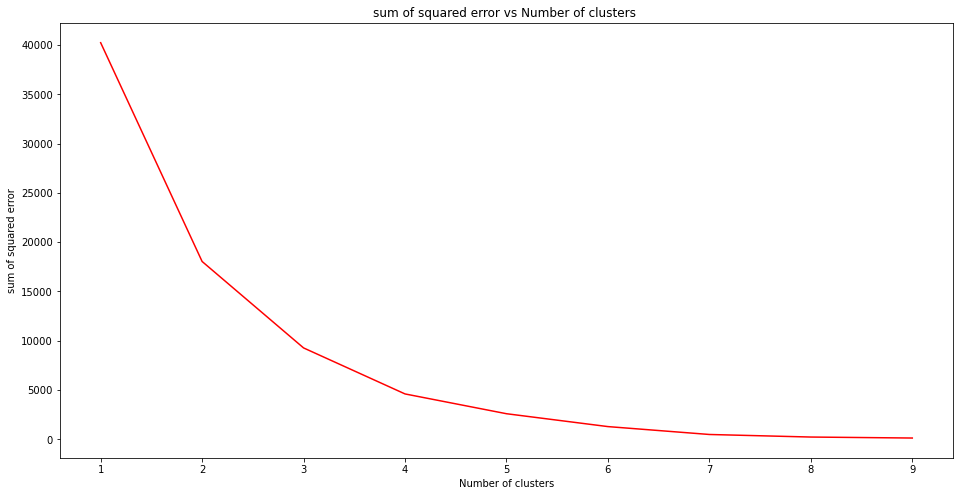

In [66]:
plt.figure(figsize=(16,8))

plt.plot(range(1,10), sum_of_squared_dist, color='r' )
plt.xlabel ('Number of clusters')
plt.ylabel ('sum of squared error')
plt.title('sum of squared error vs Number of clusters ')
plt.show()